In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math
%matplotlib inline

In [2]:
train_data= pd.read_csv('/kaggle/input/titanic/train.csv',index_col='PassengerId')
train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('/kaggle/input/titanic/test.csv',index_col='PassengerId')
#submit=pd.DataFrame(test.index)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data['Sex']=train_data['Sex'].replace({'female':1,'male':0})

train_data=pd.get_dummies(train_data,columns=['Embarked','Pclass'],drop_first=True)
train_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,26.0,0,0,7.9250,0,1,0,1
4,1,1,35.0,1,0,53.1000,0,1,0,0
5,0,0,35.0,0,0,8.0500,0,1,0,1


In [5]:
test['Sex']=test['Sex'].replace({'female':1,'male':0})


test=pd.get_dummies(test,columns=['Embarked','Pclass'],drop_first=True)
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
892,0,34.5,0,0,7.8292,1,0,0,1
893,1,47.0,1,0,7.0000,0,1,0,1
894,0,62.0,0,0,9.6875,1,0,1,0
895,0,27.0,0,0,8.6625,0,1,0,1
896,1,22.0,1,1,12.2875,0,1,0,1


In [6]:
train_data.fillna(train_data.mean(),inplace=True)
test.fillna(test.mean(),inplace=True)
test.isna().sum()


Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

In [7]:
train_data.isna().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

# ANALYSING DATA

<AxesSubplot:>

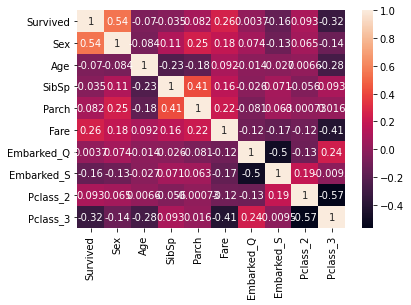

In [8]:
#Finding correlation among attributes using heatmap
corr = train_data.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

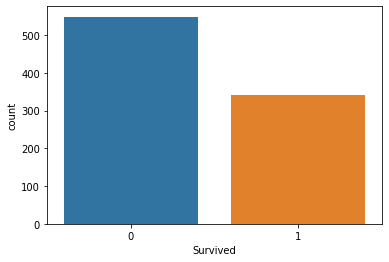

In [9]:
sns.countplot(x='Survived',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

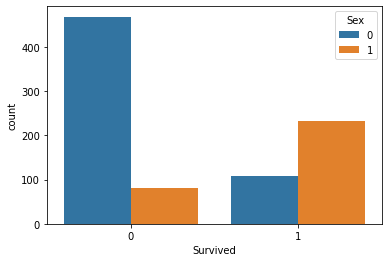

In [10]:
sns.countplot(x="Survived", hue="Sex", data=train_data)

<AxesSubplot:ylabel='Frequency'>

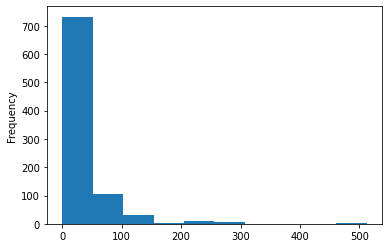

In [11]:
train_data['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

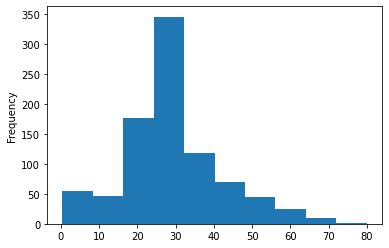

In [12]:
train_data['Age'].plot.hist()

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 84.5 KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

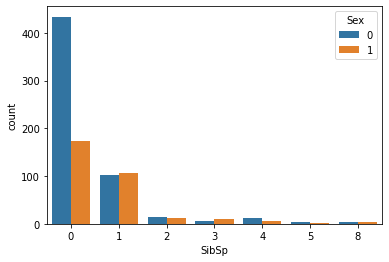

In [14]:
sns.countplot(x="SibSp",hue="Sex", data=train_data)

In [15]:
test_output=pd.read_csv('/kaggle/input/titanic/test.csv')
test_output.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
x_train=train_data.drop('Survived',axis=1)
y_train=train_data['Survived']
x_test=test
y_test = pd.read_csv("/kaggle/input/titanic/gender_submission.csv").Survived
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((891, 9), (891,), (418, 9), (418,))

MODEL BUILDING

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
x_train=train_data.drop('Survived',axis=1)
y_train=train_data['Survived']

model.fit(x_train, y_train)
y_pred=model.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


[[254  12]
 [ 12 140]]


0.9425837320574163

In [19]:

output = pd.DataFrame({'PassengerId': test_output.PassengerId, 'Survived': y_pred.astype('str')})
output.to_csv("titanic_submission.csv", index=False)